In [24]:
#import libraries
import pandas as pd #dataframe
import matplotlib.pyplot as plt #plotting
import wordcloud #generate wordcloud
import openpyxl
import nltk #tokens
import numpy as np

In [25]:
#import dataframe
df = pd.read_excel("UANL 2000.xlsx")

In [26]:
df.head()

,Authors,Title,Year,Source title,Cited by,DOI,Affiliations,Author Keywords,Language of Original Document
0,"Colunga-Pedraza P.R., Colunga-Pedraza J.E., Pe...",Diagnosis and treatment of acute lymphoblastic...,2022,Hematology (United Kingdom),NaN,10.1080/16078454.2022.2117119,"Universidad Autónoma de Nuevo León, Facultad d...",Acute lymphoblastic leukemia; Latin America; m...,English
1,"Liu Y.-C., Morales-Wong F., Patil M., Han S.B....",Femtosecond laser-assisted corneal transplanta...,2022,Scientific Reports,NaN,10.1038/s41598-022-11461-9,"Tissue Engineering and Cell Therapy Group, Sin...",NaN,English
2,"Leos-Leija A.K., Padilla-Medina J.R., Reyes-Fe...",Vertebral destruction in an 11-month-old child...,2022,Annals of Pediatric Surgery,NaN,10.1186/s43159-022-00160-9,"Department of Pediatrics, University Hospital ...",Infant; Pott’s disease; Spinal tuberculosis; S...,English
3,"Lujano-Negrete A.Y., Rodríguez-Ruiz M.C., Skin...",Bone metabolism and osteoporosis during pregna...,2022,Archives of Osteoporosis,1.0,10.1007/s11657-022-01077-x,"Rheumatology Service, Hospital Universitario “...",DXA; Lactation; Osteoporosis; Pregnancy,English
4,"García-Rodríguez F., Raygoza-Cortez K., Moreno...",Outcomes of transitional care programs on adol...,2022,Pediatric Rheumatology,2.0,10.1186/s12969-022-00670-1,"Department of Pediatrics, School of Medicine a...",Chronic conditions; Inflammatory bowel disease...,English


In [27]:
df.shape

(2000, 9)

In [28]:
#get number of nan values per column
df.isnull().sum()

Authors                            0
Title                              0
Year                               0
Source title                       1
Cited by                         616
DOI                              123
Affiliations                       1
Author Keywords                  634
Language of Original Document      1
dtype: int64

In [30]:
#drop nan values and print head
df.head()

,Authors,Title,Year,Source title,Cited by,DOI,Affiliations,Author Keywords,Language of Original Document
0,"Colunga-Pedraza P.R., Colunga-Pedraza J.E., Pe...",Diagnosis and treatment of acute lymphoblastic...,2022,Hematology (United Kingdom),NaN,10.1080/16078454.2022.2117119,"Universidad Autónoma de Nuevo León, Facultad d...",Acute lymphoblastic leukemia; Latin America; m...,English
1,"Liu Y.-C., Morales-Wong F., Patil M., Han S.B....",Femtosecond laser-assisted corneal transplanta...,2022,Scientific Reports,NaN,10.1038/s41598-022-11461-9,"Tissue Engineering and Cell Therapy Group, Sin...",NaN,English
2,"Leos-Leija A.K., Padilla-Medina J.R., Reyes-Fe...",Vertebral destruction in an 11-month-old child...,2022,Annals of Pediatric Surgery,NaN,10.1186/s43159-022-00160-9,"Department of Pediatrics, University Hospital ...",Infant; Pott’s disease; Spinal tuberculosis; S...,English
3,"Lujano-Negrete A.Y., Rodríguez-Ruiz M.C., Skin...",Bone metabolism and osteoporosis during pregna...,2022,Archives of Osteoporosis,1.0,10.1007/s11657-022-01077-x,"Rheumatology Service, Hospital Universitario “...",DXA; Lactation; Osteoporosis; Pregnancy,English
4,"García-Rodríguez F., Raygoza-Cortez K., Moreno...",Outcomes of transitional care programs on adol...,2022,Pediatric Rheumatology,2.0,10.1186/s12969-022-00670-1,"Department of Pediatrics, School of Medicine a...",Chronic conditions; Inflammatory bowel disease...,English


In [31]:
#reassign values after method
df = df.dropna()

In [32]:
#get dimensions
df.shape

(933, 9)

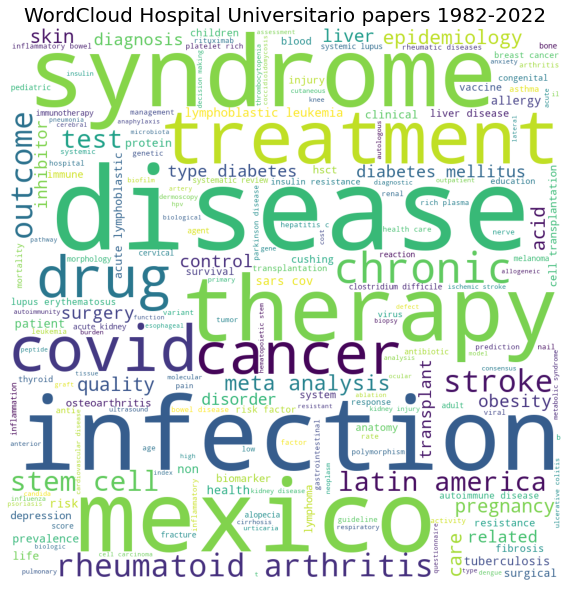

In [35]:
#libraries to print WordCloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 
comment_words = ''
stopwords = set(STOPWORDS)

#for cycle to iterate across Author Keywords
for word in df["Author Keywords"]:
     
    word = str(word)
    
    #tokenize words
    tokens = word.split()
    
    #convert tokens to lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the cloud                     
plt.figure(figsize = (8, 8), facecolor = None)
plt.title("WordCloud Hospital Universitario papers 1982-2022", fontsize= 20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()